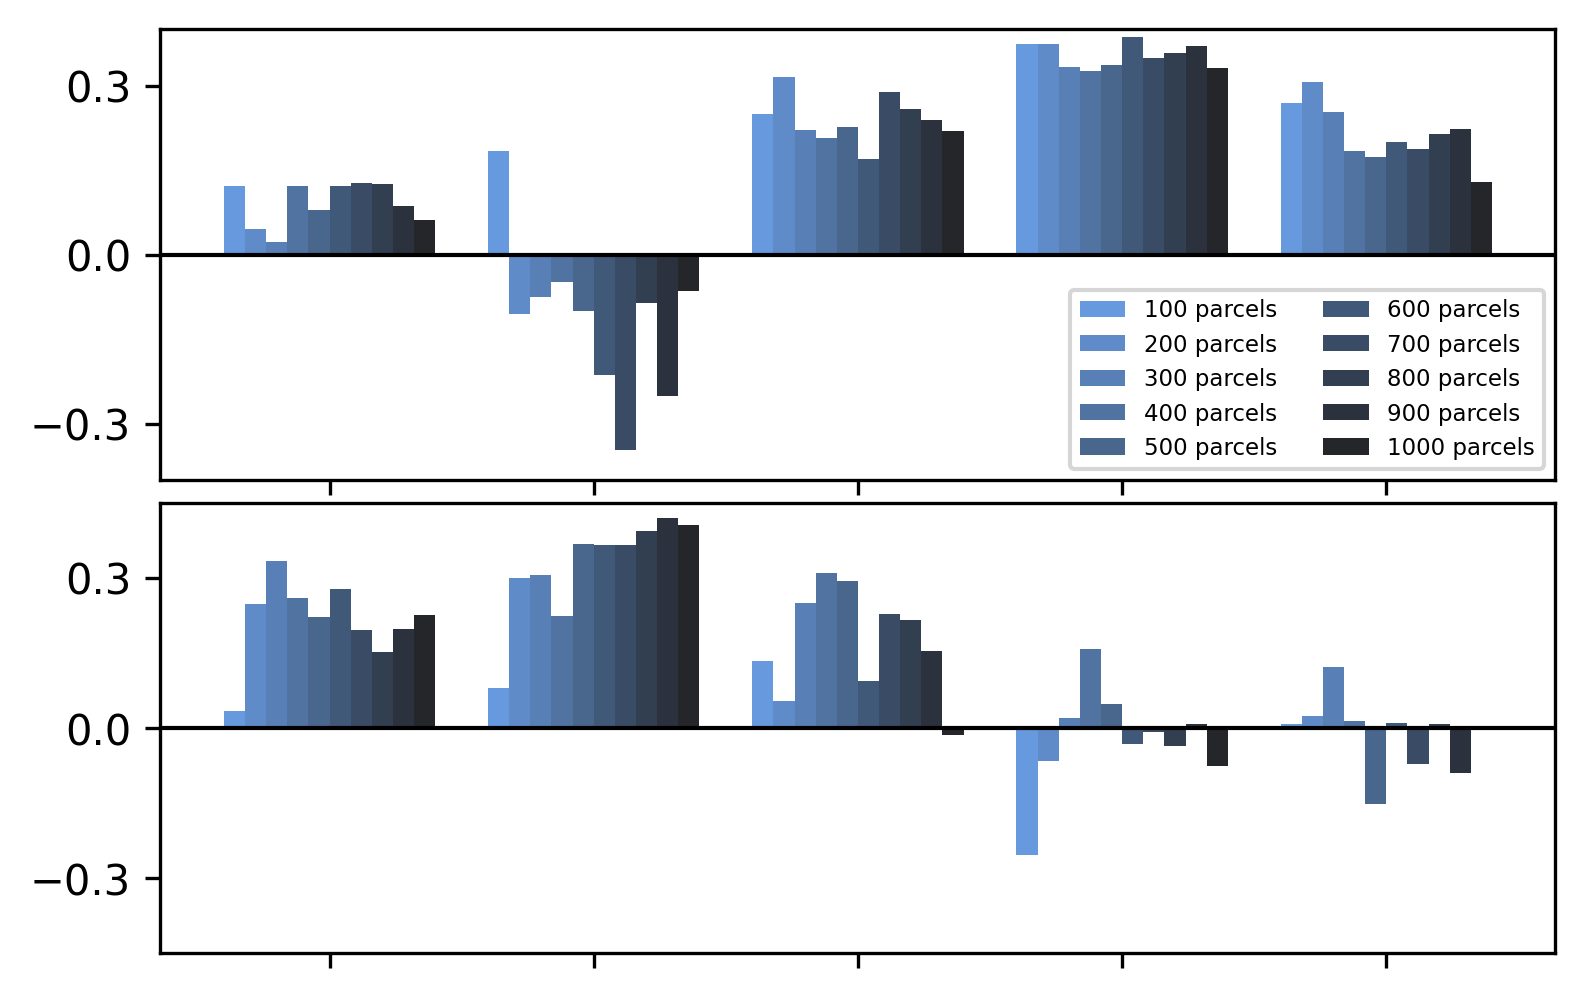

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

model_predictivity = np.load('_DATA/hippocampo_cortical_model_predictivity.npy')
model_predictivity_BERT = np.load('_DATA/narrative_coherence_model_predictivity.npy')

color_palette = sns.dark_palette("#69d", 10, reverse=True)

fig, axes = plt.subplots(2, 1, figsize=(6,4), dpi=300, sharex=True, )
width = 0.08
x = np.arange(3)
for b in range(2): # 0: ordering, 1: content
    for nr in range(10): # index represents the number of ROIs, e.g., 0: 100, 1: 200, 2: 300, ...
        num_rois = (nr+1)*100
        axes[b].bar(x + width*nr, model_predictivity[nr,b,[0,1,2]], width=width,
                    color=color_palette[nr], label=f'{num_rois} parcels', zorder=5)
        axes[b].bar(np.array([3]) + width*nr, model_predictivity_BERT[nr,b,1], width=width,
            color=color_palette[nr], zorder=5)
        axes[b].bar(np.array([4]) + width*nr, model_predictivity_BERT[nr,b,4], width=width,
            color=color_palette[nr], zorder=5)
    axes[b].set_yticks([-0.3, 0.0, 0.3])
axes[1].set_xticks(np.arange(5)+width*4+width/2)
axes[1].set_xticklabels([])
axes[0].legend(loc='lower right', ncol=2, prop={'size': 5.5})

for ax in axes:
    ax.axhline(0.0, c='k', lw=1, zorder=5)
axes[0].set_ylim(-0.4, 0.4)
axes[1].set_ylim(-0.45, 0.45)
plt.subplots_adjust(hspace=0.05)
plt.show()